# Problem Statement : Linear Regression
## You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

## Data Dictionary for Firm_level_data:

1. sales: Sales (in millions of dollars).
2. capital: Net stock of property, plant, and equipment.
3. patents: Granted patents.
4. randd: R&D stock (in millions of dollars).
5. employment: Employment (in 1000s).
6. sp500: Membership of firms in the S&P 500 index. S&P is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States
7. tobinq: Tobin's q (also known as q ratio and Kaldor's v) is the ratio between a physical asset's market value and its replacement value.
8. value: Stock market value.
9. institutions: Proportion of stock owned by institutions.

## 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. (8 marks)

## 1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
# visualisations
import matplotlib.pyplot as plt   
import matplotlib.style
import seaborn as sns
# model building and performance evaluation
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**load the dataset into pandas dataframe**

In [2]:
df = pd.read_csv("Firm_level_data.csv")

### Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

* head of the dataset

* shape of the dataset

* info of the dataset

* summary of the dataset

**check the loaded data**

In [3]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


**- data is loaded properly into the dataframe df**

**shape of the dataset**

In [5]:
df.shape

(759, 10)

- 759 observations were provided for analysis 
- 10 features are available for analysis

**Basic information of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


1. Null values are present in the data
2. Float,int and object data types are present in our data

In [7]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

**5-POINT summary of the dataset**

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sales,759.0,NaN,NaN,NaN,2689.705158,8722.060124,0.138,122.92,448.577082,1822.547366,135696.7882
capital,759.0,NaN,NaN,NaN,1977.747498,6466.704896,0.057,52.650501,202.179023,1075.79002,93625.20056
patents,759.0,NaN,NaN,NaN,25.831357,97.259577,0.0,1.0,3.0,11.5,1220.0
randd,759.0,NaN,NaN,NaN,439.938074,2007.397588,0.0,4.628262,36.864136,143.253403,30425.25586
employment,759.0,NaN,NaN,NaN,14.164519,43.321443,0.006,0.9275,2.924,10.050001,710.799925
sp500,759,2,no,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tobinq,738.0,NaN,NaN,NaN,2.79491,3.366591,0.119001,1.018783,1.680303,3.139309,20.0
value,759.0,NaN,NaN,NaN,2732.73475,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.59116
institutions,759.0,NaN,NaN,NaN,43.02054,21.685586,0.0,25.395,44.11,60.51,90.15


- All the numeric variables are having outliers in the data as 3rd quartile and max values are very far 
- Majority of the companies are not listed in S&P500
- Type of the companies are ranging from Low to Very high as it can be seen from the number of employees ; Its varying from 6 to 7 lacs
- and also other attributes are also varying accordingly 
- The stock market value is also showing very high range


**Lets check the distribution of S&P500 variable**

In [9]:
df["sp500"].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

In [10]:
df["sp500"].value_counts(normalize=True)

no     0.714097
yes    0.285903
Name: sp500, dtype: float64

- 71% of the companies are listed in S&P500 INDEX


#### Null values check and count :

In [11]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

- 21 missing values were found in the tobinq column
- missing values is only 2.7% of the records hence we decided to impute the value with out treating outliers 
- We will impute the missing values with median

In [12]:
tobinq_median = df['tobinq'].median()

In [13]:
df['tobinq'] = df['tobinq'].fillna(tobinq_median)

In [14]:
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

**Now we see that the missing values are imputed**

#### Checking for duplicates

In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


- There are no duplicate records in the dataset

**Univariate Analysis**

**Count plot for sp500 variable**

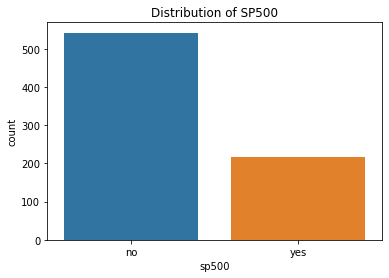

In [16]:
sns.countplot(data = df , x =df['sp500'] );
plt.title("Distribution of SP500")
plt.show()

In [17]:
# Create a list of numeric variables
df_numeric = df.select_dtypes(include=['float64','int64']).columns.to_list()
print(df_numeric)
len(df_numeric)


['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']


8

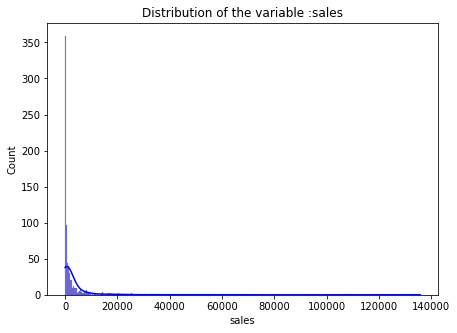

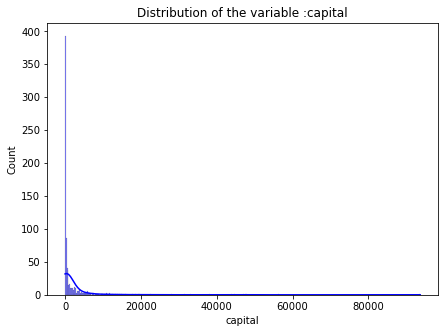

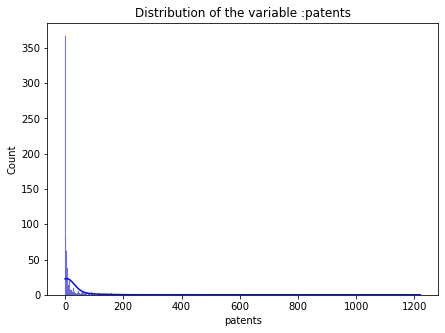

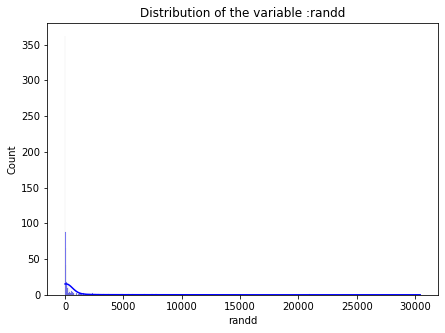

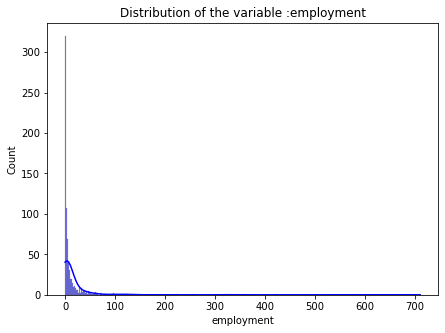

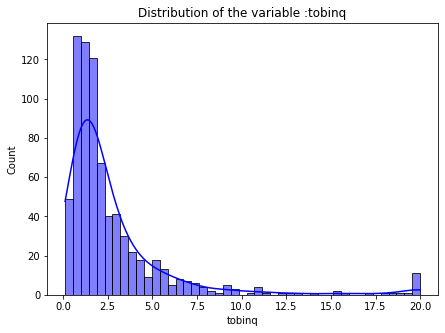

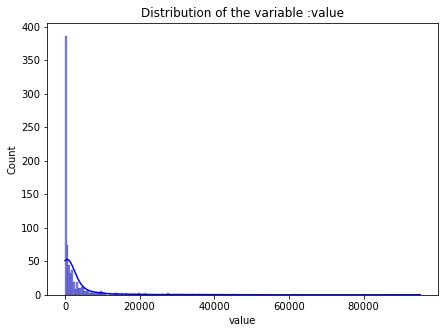

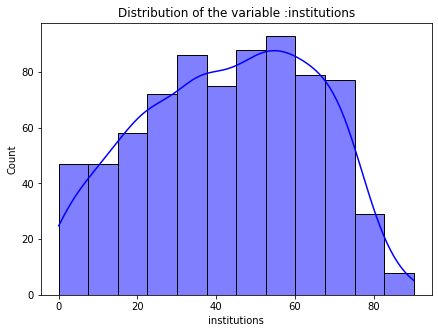

In [18]:
## Lets analyse the continuous values by creating histograms and boxplot to understand
# the distribution and spread of the data
for feature in df_numeric:
    plt.figure(figsize=(7,5))
    sns.histplot(df[feature],kde=True,color='blue') # hist plot to show distribution
    plt.title("Distribution of the variable :"+feature)
    plt.show()

Inference:
1. 'sales', 'capital', 'patents', 'randd', 'employment','value' - Are extremely skewed towards right
2.   'tobinq' - Right skewed but not extreme
3.   'institutions' - Normal distrinution

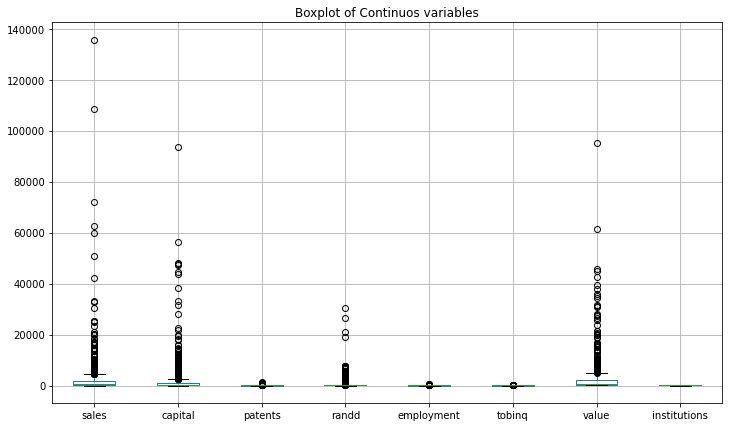

In [20]:
plt.figure(figsize=(12,7))
df[df_numeric].boxplot()
plt.title("Boxplot of Continuos variables")
plt.show()

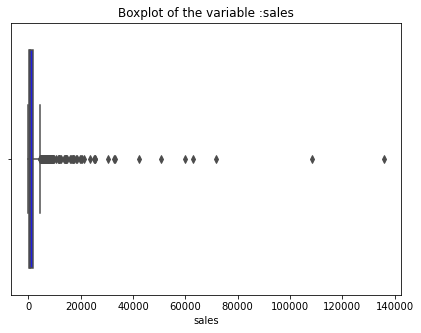

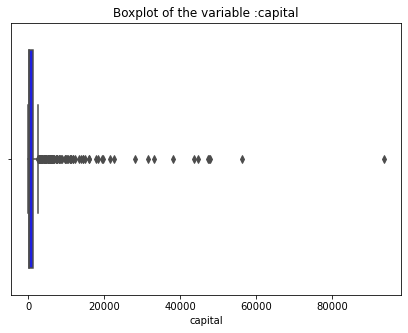

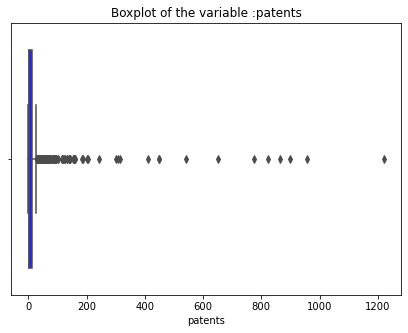

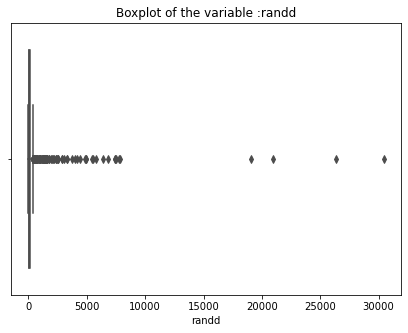

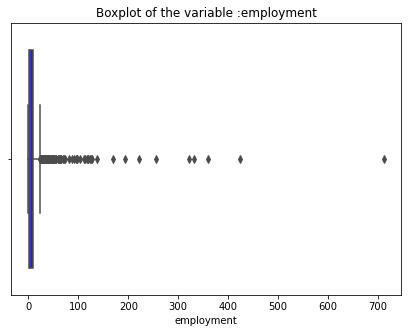

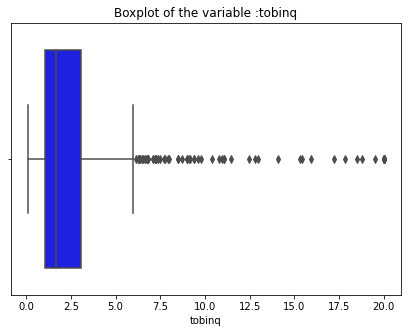

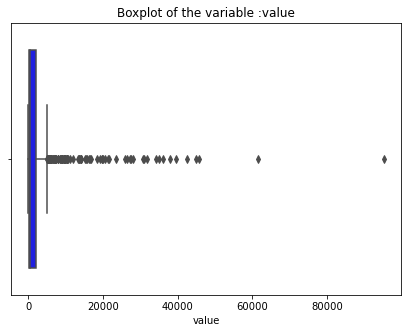

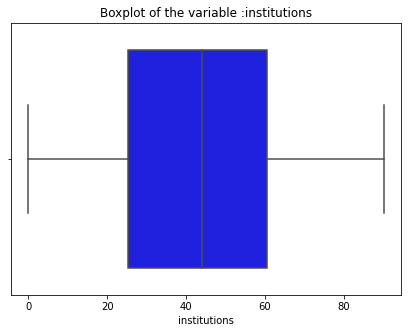

In [25]:
## Lets analyse the continuous values by creating histograms and boxplot to understand
# the distribution and spread of the data
for feature in df_numeric:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=feature,data=df,color='blue') # boxplot to show the spread
    plt.title("Boxplot of the variable :"+feature)
    plt.show()

Inferecnce: 
    
    Except institutions all the other variables are having outliers in them

### Bivariate Analysis

**Pair Plot**

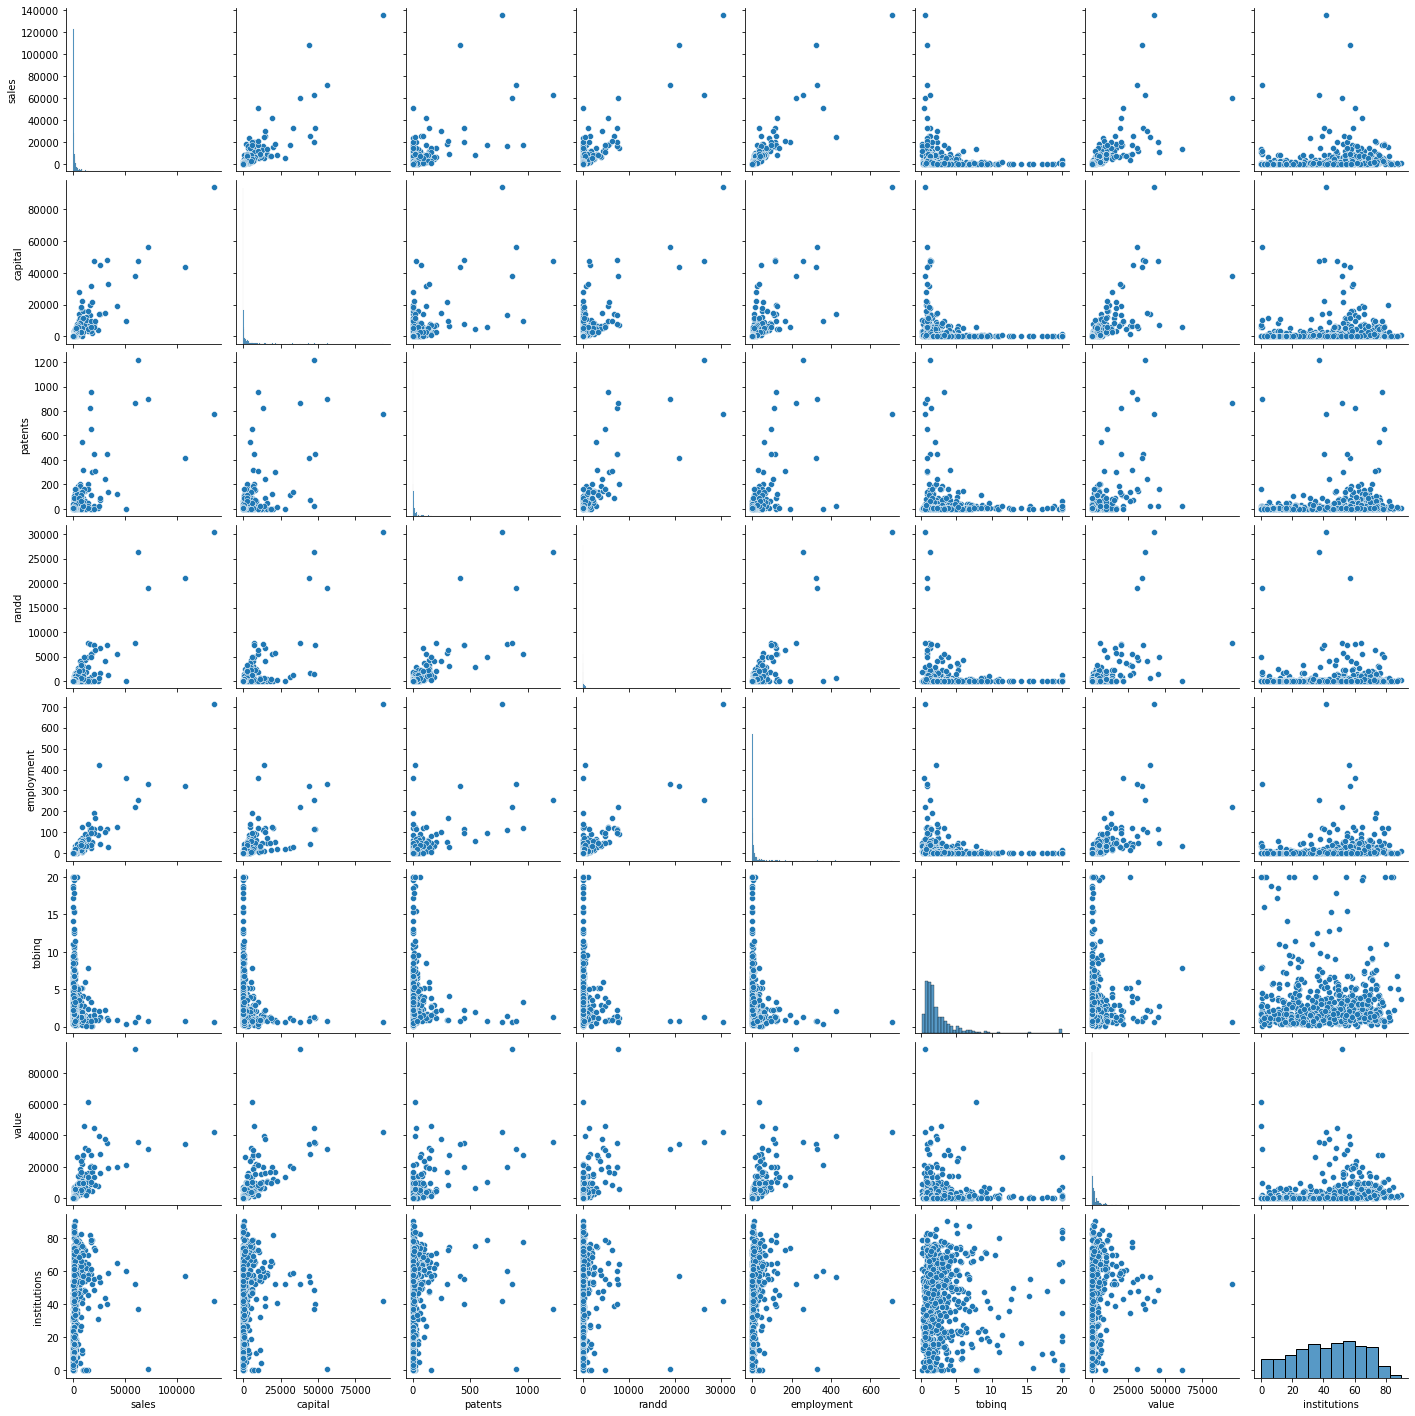

In [26]:
#plt.figure(figsize=(20,15))
sns.pairplot(df[df_numeric]);

**HeatMap**


C:\Users\vasan\AppData\Local\Temp/ipykernel_13456/904739677.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


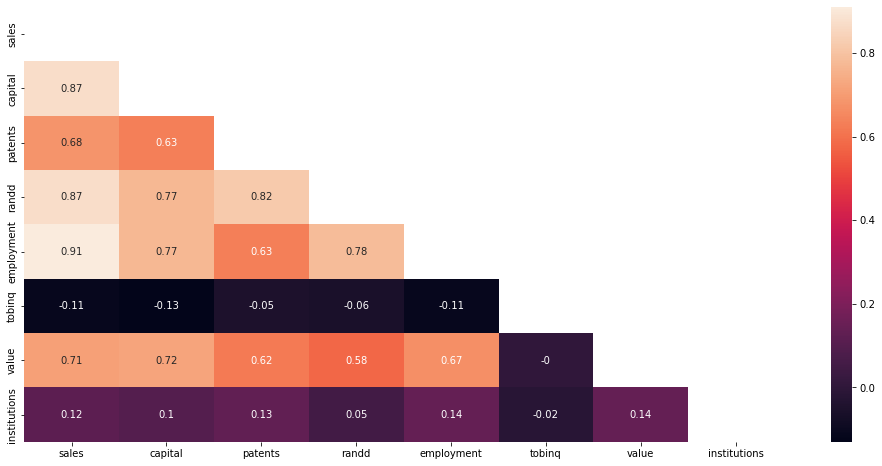

In [27]:
corr = df[df_numeric].corr()
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask);

**Inference from Pair Plot and Heat Map :**
- From the pair plot and heat map we see that multicollinearity is present in the datase
1. Sales is highly positively correlated with Value,employment,tandd,patenets,capital and has low correlation with Institutions and Negative correlation with tobinq
2. Capital is highly positively correlated with Vlaue,employment,randd and patents
3. Patents is haghly positively correlated with Value and Employment
4. tobinq is negatively correlated with all the variables 
5. Institution is having very low correlation with all the variables 

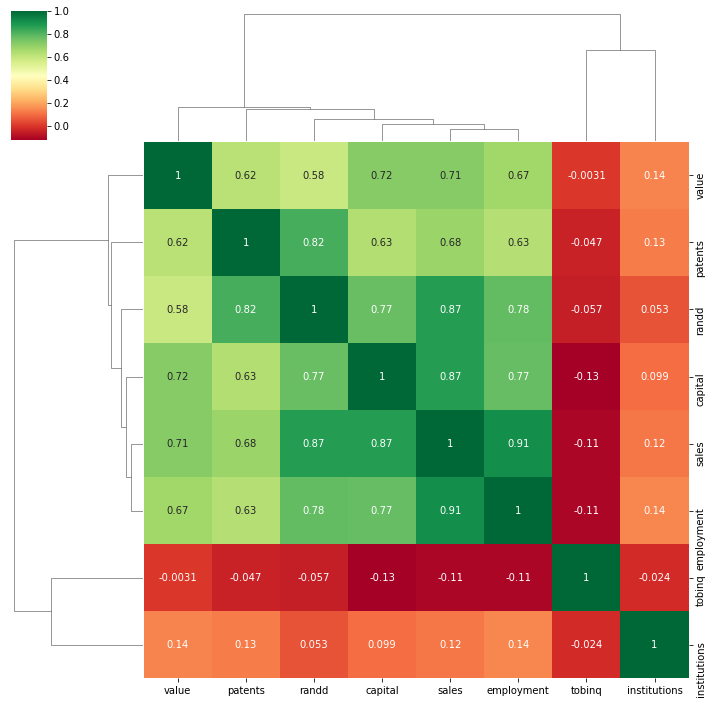

In [28]:
sns.clustermap(df.corr(),annot=True,cmap='RdYlGn')

**Skewness of the Data:**

In [29]:
import scipy.stats as stats

In [30]:
pd.DataFrame((stats.skew(df[df_numeric])),index=df_numeric,columns=['Skewness'])

,Skewness
sales,9.200794
capital,7.540152
patents,7.751585
randd,10.250175
employment,9.050942
tobinq,3.337128
value,6.063981
institutions,-0.167739


### Treating Outliers:

To treat outliers lets define a function **'treat_outlier'**. 

- For the higher outliers we will treat it to get it at 95 percentile value. 

- Lower level outliers will be treated to get it at 5 percentile value.

In [31]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [32]:
df.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

In [33]:
outlier_list = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq','value']

In [34]:
for i in df[outlier_list]:    
    df[i]=treat_outlier(df[i])

In [35]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10.0,1615.485827,2.306000,no,8.509244,1625.453755,80.27
1,407.753973,122.101012,2.0,0.000000,1.860000,no,0.844187,243.117082,59.02
2,11422.229769,8377.522075,100.0,1615.485827,52.613603,yes,5.205257,13446.669710,47.70
3,451.000010,266.899987,1.0,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2.0,14.233637,1.947000,no,1.063300,67.406408,49.46


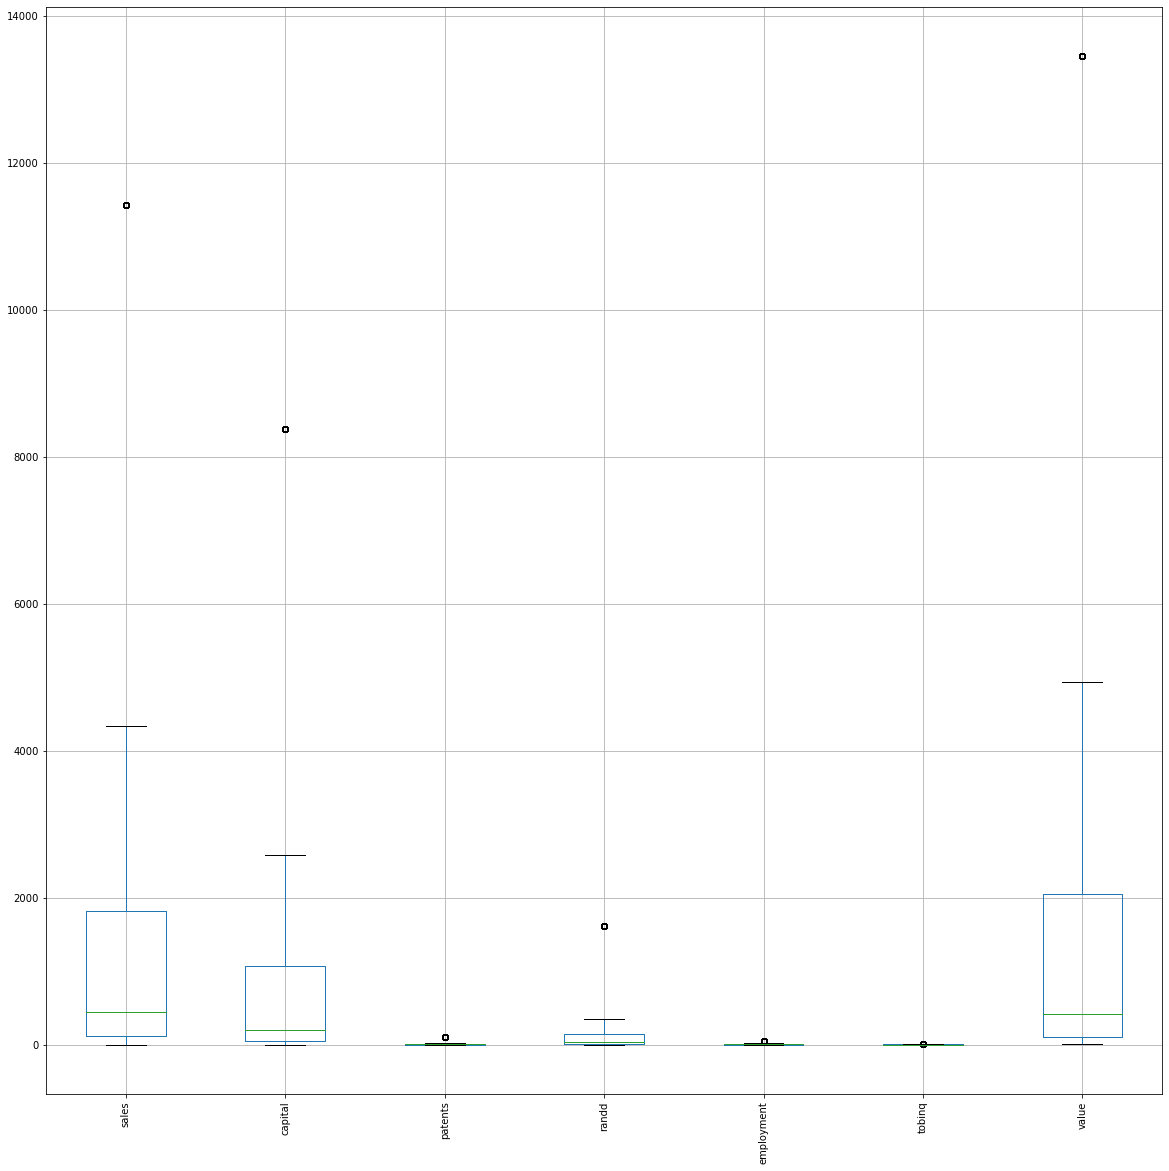

In [36]:
df[outlier_list].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## Encoding the categorical Variable:

In [37]:
df2 = df.copy()

In [38]:
df2['sp500'] = df2['sp500'].replace(to_replace=['yes','no'],value=[1,0])

In [39]:
df2.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10.0,1615.485827,2.306000,0,8.509244,1625.453755,80.27
1,407.753973,122.101012,2.0,0.000000,1.860000,0,0.844187,243.117082,59.02
2,11422.229769,8377.522075,100.0,1615.485827,52.613603,1,5.205257,13446.669710,47.70
3,451.000010,266.899987,1.0,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2.0,14.233637,1.947000,0,1.063300,67.406408,49.46


### Train-Test Split

In [40]:
# Copy all the predictor variables into X dataframe
X = df2.drop('sales', axis=1)

# Copy target into the y dataframe. 
y = df2[['sales']]

In [41]:
X

,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,161.603986,10.0,1615.485827,2.306000,0,8.509244,1625.453755,80.27
1,122.101012,2.0,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8377.522075,100.0,1615.485827,52.613603,1,5.205257,13446.669710,47.70
3,266.899987,1.0,83.540161,3.071000,0,0.305221,63.024630,26.88
4,140.124004,2.0,14.233637,1.947000,0,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...
754,708.299935,100.0,1615.485827,22.100002,1,0.697454,267.119487,33.50
755,73.666008,1.0,0.037735,1.684000,0,1.680303,228.475701,46.41
756,123.926991,13.0,74.861099,1.460000,0,5.229723,580.430741,42.25
757,138.780992,6.0,0.621750,2.900000,1,1.625398,309.938651,61.39


In [42]:
# Split X and y into training and test set in 75:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [43]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (531, 8)
X_test:  (228, 8)
y_train:  (531, 1)
y_test:  (228, 1)


## Train and test data with Scaling 

**To avoid data leakage we will scale the data after splitting**

In [44]:
# for distance based models , creating scaled data for training 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) 
X_test_scaled = sc.transform(X_test)

In [45]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 688.1930706444979
The coefficient for patents is 31.97822679408158
The coefficient for randd is 202.7748144804747
The coefficient for employment is 1387.4490653693026
The coefficient for sp500 is 133.18042980305282
The coefficient for tobinq is -218.4328289032028
The coefficient for value is 1397.6836457563784
The coefficient for institutions is -84.44783095731295


In [188]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2221.998070985296


### Prediction equation:

**sales = 2221.998070985296 + 688.1930706444979 * (capital) + 31.97822679408158 * patents + 202.7748144804747 * randd + 1387.4490653693026 * employment +
133.18042980305282 * sp500  - 218.4328289032028 * tobinq + 1397.6836457563784 * value - 84.44783095731295 * institutions**

In [189]:
# R square on training data
regression_model.score(X_train_scaled, y_train)

0.8578443509588117

In [190]:
# R square on testing data
regression_model.score(X_test_scaled, y_test)

0.8911089612416944

In [191]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1420.4212932262537

In [192]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1190.3199694838904

## Important features

In [228]:
importance = regression_model.coef_

In [235]:
importance

array([[ 688.19307064,   31.97822679,  202.77481448, 1387.44906537,
         133.1804298 , -218.4328289 , 1397.68364576,  -84.44783096]])

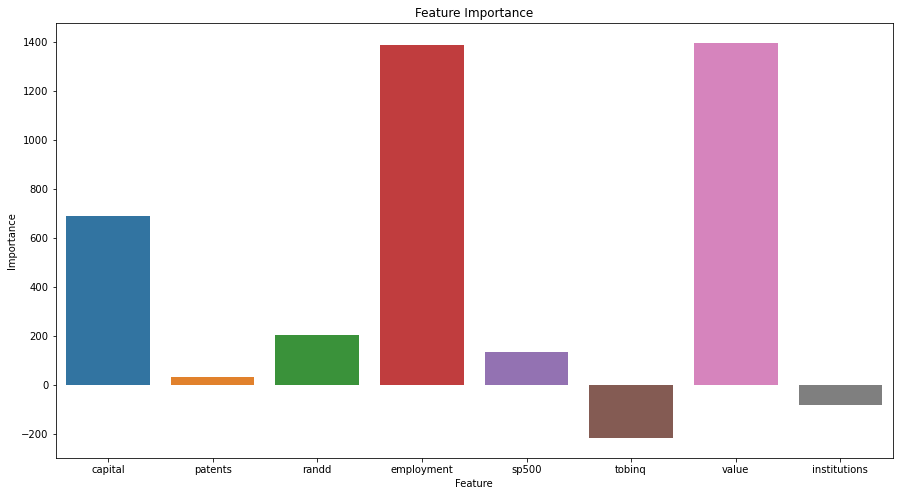

In [244]:
plt.figure(figsize=(15,8))
sns.barplot(y=[688.19307064,   31.97822679,  202.77481448, 1387.44906537,
         133.1804298 , -218.4328289 , 1397.68364576,  -84.44783096],x=X_train.columns)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## Linear regression using StatsModels:

In [205]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [206]:
X_train_scaled

,capital,patents,randd,employment,sp500,tobinq,value,institutions
626,-0.137986,-0.141276,-0.389187,0.298347,-0.639131,-0.369799,-0.045260,-0.566460
333,-0.563068,-0.500210,-0.501141,-0.606267,-0.639131,-0.946042,-0.565672,-1.016774
257,-0.392135,-0.003224,-0.364509,-0.261563,-0.639131,-0.157857,-0.329222,1.191051
173,-0.304197,-0.555431,-0.396839,-0.205828,1.564625,0.305000,-0.047626,1.193353
242,-0.436486,-0.500210,-0.517320,-0.550304,-0.639131,-0.145368,-0.484129,1.917631
...,...,...,...,...,...,...,...,...
645,-0.284786,2.205605,2.307581,-0.064045,-0.639131,-0.408167,-0.226143,0.246222
715,-0.453531,-0.555431,-0.515472,-0.453621,-0.639131,-0.850250,-0.512940,-1.309616
72,-0.559300,-0.555431,-0.511172,-0.547461,-0.639131,-0.767889,-0.555229,-0.649801
235,-0.557277,-0.500210,-0.426291,-0.604333,-0.639131,-0.239977,-0.551196,-0.360642


In [207]:
y_train

,sales
626,1947.224100
333,60.327997
257,1065.748032
173,1193.647768
242,164.135025
...,...
645,1404.751664
715,1802.464358
72,130.071021
235,72.550002


In [208]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [209]:
X_test_scaled

,capital,patents,randd,employment,sp500,tobinq,value,institutions
480,-0.551487,-0.527821,-0.434831,-0.573224,-0.639131,-0.664003,-0.559902,-0.407608
622,-0.541592,-0.472600,-0.429449,-0.445090,-0.639131,-0.549399,-0.529379,-1.146158
638,-0.202282,-0.030834,-0.379835,0.441438,1.564625,-0.260085,-0.072673,0.191889
389,-0.545586,-0.472600,-0.438933,-0.569982,-0.639131,-0.096544,-0.548713,-0.880483
748,-0.467126,-0.500210,-0.379131,-0.452825,-0.639131,-0.331728,-0.443139,-1.276464
...,...,...,...,...,...,...,...,...
285,-0.143444,2.205605,-0.024341,0.117947,-0.639131,-0.844995,-0.456108,0.104405
632,-0.360385,-0.279327,2.307581,0.095198,1.564625,-0.079740,-0.162711,0.250826
358,-0.489017,-0.472600,-0.517320,-0.386796,-0.639131,-0.776267,-0.483045,0.899130
447,-0.525871,-0.555431,-0.490936,-0.591480,-0.639131,0.001989,-0.501954,0.897289


In [210]:
y_test

,sales
480,88.058982
622,309.068061
638,2273.100314
389,123.318003
748,331.155951
...,...
285,1905.000425
632,1530.005924
358,625.067134
447,187.701025


In [211]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_scaled, y_train], axis=1)
data_test=pd.concat([X_test_scaled,y_test],axis=1)

(531, 9)

In [212]:
data_train

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
626,-0.137986,-0.141276,-0.389187,0.298347,-0.639131,-0.369799,-0.045260,-0.566460,1947.224100
333,-0.563068,-0.500210,-0.501141,-0.606267,-0.639131,-0.946042,-0.565672,-1.016774,60.327997
257,-0.392135,-0.003224,-0.364509,-0.261563,-0.639131,-0.157857,-0.329222,1.191051,1065.748032
173,-0.304197,-0.555431,-0.396839,-0.205828,1.564625,0.305000,-0.047626,1.193353,1193.647768
242,-0.436486,-0.500210,-0.517320,-0.550304,-0.639131,-0.145368,-0.484129,1.917631,164.135025
...,...,...,...,...,...,...,...,...,...
645,-0.284786,2.205605,2.307581,-0.064045,-0.639131,-0.408167,-0.226143,0.246222,1404.751664
715,-0.453531,-0.555431,-0.515472,-0.453621,-0.639131,-0.850250,-0.512940,-1.309616,1802.464358
72,-0.559300,-0.555431,-0.511172,-0.547461,-0.639131,-0.767889,-0.555229,-0.649801,130.071021
235,-0.557277,-0.500210,-0.426291,-0.604333,-0.639131,-0.239977,-0.551196,-0.360642,72.550002


In [213]:
data_test

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
480,-0.551487,-0.527821,-0.434831,-0.573224,-0.639131,-0.664003,-0.559902,-0.407608,88.058982
622,-0.541592,-0.472600,-0.429449,-0.445090,-0.639131,-0.549399,-0.529379,-1.146158,309.068061
638,-0.202282,-0.030834,-0.379835,0.441438,1.564625,-0.260085,-0.072673,0.191889,2273.100314
389,-0.545586,-0.472600,-0.438933,-0.569982,-0.639131,-0.096544,-0.548713,-0.880483,123.318003
748,-0.467126,-0.500210,-0.379131,-0.452825,-0.639131,-0.331728,-0.443139,-1.276464,331.155951
...,...,...,...,...,...,...,...,...,...
285,-0.143444,2.205605,-0.024341,0.117947,-0.639131,-0.844995,-0.456108,0.104405,1905.000425
632,-0.360385,-0.279327,2.307581,0.095198,1.564625,-0.079740,-0.162711,0.250826,1530.005924
358,-0.489017,-0.472600,-0.517320,-0.386796,-0.639131,-0.776267,-0.483045,0.899130,625.067134
447,-0.525871,-0.555431,-0.490936,-0.591480,-0.639131,0.001989,-0.501954,0.897289,187.701025


### Model Building

In [214]:
data_train.columns

Index(['capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'value',
       'institutions', 'sales'],
      dtype='object')

In [215]:
expr= 'sales ~ capital + patents + randd + employment + sp500 + tobinq + value + institutions '

In [216]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       2221.998071
capital          688.193071
patents           31.978227
randd            202.774814
employment      1387.449065
sp500            133.180430
tobinq          -218.432829
value           1397.683646
institutions     -84.447831
dtype: float64

In [217]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     393.8
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          1.43e-215
Time:                        21:10:45   Log-Likelihood:                -4607.8
No. Observations:                 531   AIC:                             9234.
Df Residuals:                     522   BIC:                             9272.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2221.9981     62.170     35.741   

**RMSE ON TRAIN DATA**

In [220]:
# Calculate MSE
mse_train = np.mean((lm1.predict(data_train.drop('sales',axis=1))-data_train['sales'])**2)

In [221]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_train)

1420.4212932262542

**RMSE ON TEST DATA**

In [222]:
# Calculate MSE
mse_test = np.mean((lm1.predict(data_test.drop('sales',axis=1))-data_test['sales'])**2)

In [223]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_test)

1190.3199694838913

In [224]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

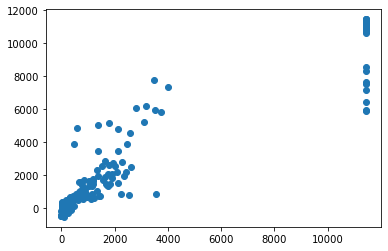

In [225]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [226]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2222.0) * Intercept + (688.19) * capital + (31.98) * patents + (202.77) * randd + (1387.45) * employment + (133.18) * sp500 + (-218.43) * tobinq + (1397.68) * value + (-84.45) * institutions + 

 # Conclusion

### The final Linear Regression equation is  : Statsmodel

**sales = (2222.0) * Intercept + (688.19) * capital + (31.98) * patents + (202.77) * randd + (1387.45) * employment + (133.18) * sp500 + (-218.43) * tobinq + (1397.68) * value + (-84.45) * institutions**

## Interpretation of the equation:

When **capital** increases by 1 unit, **sales** increases 688.19 units, keeping all other predictors constant.
similarly, when **employment** increases by 1 unit, **sales** increases by 1387 units, keeping all other predictors constant.

We have negative coefficient values also for instance if tobinq decreases by 1 unit sales decreased by 218 units 

**END**